# Telecom Company Customer Analysis

Clustering is widely used in the data industry. It is commonly used to find some kind of group structure in the data, if it exists. If any common groups of data points, or clusters, are found, the clusters are further explored to find any patterns or commonalities. 

This process is very useful when dealing with transactional data. If we have information on customers' spending, we can use clustering to find possible groups of customers (i.e. risky and conservative spenders). 

For this codealong, we are going to use a data set from [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata). You can download the data [here](https://drive.google.com/open?id=16sHz6gYoYUTFpf_0hOWEdFgFs053Tqr2). 

This data contains usage behavior of about 9000 active credit card holders during a period of 6 months. There are 18 features describing different behaviours of customers:

- CUST_ID : Identification of Credit Card holder (Categorical) 

- BALANCE : Balance amount left in their account to make purchases 

- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

- PURCHASES : Amount of purchases made from account 

- ONEOFF_PURCHASES : Maximum purchase amount done in one-go

- INSTALLMENTS_PURCHASES : Amount of purchase done in installment 

- CASH_ADVANCE : Cash in advance given by the user 

- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 

- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 

- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 

- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid 

- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" 

- PURCHASES_TRX : Numbe of purchase transactions made C

- REDIT_LIMIT : Limit of Credit Card for user 

- PAYMENTS : Amount of Payment done by user 

- MINIMUM_PAYMENTS : Minimum amount of payments made by user 

- PRCFULLPAYMENT : Percent of full payment paid by user 

- TENURE : Tenure of credit card service for user

## Preprocessing

Let's read in the data and look at the size and some summary statistics, as well as some plots. 

- Do we have to deal with missing data?
- Are any of the features really skewed? Can we transform them?
- Is scaling required for this data set?

## Clustering

Let's use some of the clustering methods on this data set. For each, we'll have to decide how many clusters would be appropriate.

- K-means 
- Hierarchical Clustering
- DBSCAN

<div style="position:relative; float:center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3f7PIi8r8MB27iAINa3eIIv_SbQKzGOCAG4QmQUYeXDTuhfR9g9FdJZMKDu_F2JpqQ1KbGSY5FxRWhfggia2Ch07wDKBcRBjZCNJQTfKbwrqZ5bOiyuXVFg7EglKk0u46le802mfo0vgmaXr2poXNsl2w=w781-h385-no?authuser=0" />

## Comparing Found Groups

We now need to explore the found groups. We will look at:
- How similar are the results between the different clustering algorithms?
- For each clustering result, what are the main differences between the found groups? 
- Are the found groups statistically different from each other?
- Based on the exploration of the found groups, what are the characteristic of each group? Do they represent some type of customer?

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('telecom.csv')

df.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


###  1 - Preprocessing & EDA

The first task to complete in any exercise like this is to explore the data and consider any cleaning/preprocessing steps we may need to do to get this in position for analysis. 

The key things we need to touch upon are:

 - Shape of dataframe
 - Check column datatypes are appropriate
 - Will we need to engineer certain features into a numeric format?
 - Are there null values that we must deal with?
 - Get an idea of the distributions of these columns. 

In [5]:
# Shape of the dataframe

df.shape

(3333, 10)

3333 customers and 10 features. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     3333 non-null   int64  
 1   ContractRenewal  3333 non-null   int64  
 2   DataPlan         3333 non-null   int64  
 3   DataUsage        3333 non-null   float64
 4   CustServCalls    3333 non-null   int64  
 5   DayMins          3333 non-null   float64
 6   DayCalls         3333 non-null   int64  
 7   MonthlyCharge    3333 non-null   float64
 8   OverageFee       3333 non-null   float64
 9   RoamMins         3333 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 260.5 KB


Ok, it looks like we have 8.95k customers and 18 columns. A quick check of the data types suggests that everything is in an appropriate format. More importantly it doesn't look like we will need to do any feature engineering (such as one-hot encoding). 

*Note*: 

Customer_ID is an object. Ultimately this is an identifier column, the actual numeric value does not matter, just that its unique to the customer. Leaving it as a string will mean we don't accidentaly carry out mathematical operations on it. I will likely drorp this before doing the clustering.


In [7]:
# Check for duplicates rows
df.duplicated().sum()

0

In [8]:
# Check for duplicates columns
df.T.duplicated()

AccountWeeks       False
ContractRenewal    False
DataPlan           False
DataUsage          False
CustServCalls      False
DayMins            False
DayCalls           False
MonthlyCharge      False
OverageFee         False
RoamMins           False
dtype: bool

We have 3333 customers, 10 features. No duplicates and data format is ok. Let's check the null values:

In [9]:
df.isna().sum()

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [10]:
df.isna().mean()

AccountWeeks       0.0
ContractRenewal    0.0
DataPlan           0.0
DataUsage          0.0
CustServCalls      0.0
DayMins            0.0
DayCalls           0.0
MonthlyCharge      0.0
OverageFee         0.0
RoamMins           0.0
dtype: float64

Given the proportion of missing values from the two columns we pretty much have free reign on the method we want to take. We could simply delete these values, we wouldn't lose that much data. We could also try imputation as we are unlikely to introduce too much bias/skew into the data. 

Let's quickly explore the missing values in `MINIMUM_PAYMENTS` to see if we can find a pattern to use to impute. I don't think its worth imputing with the mean/median here. 

In [11]:
# Filter dataframe for nulls in MINIMUM_PAYMENTS

cc_df[cc_df['MINIMUM_PAYMENTS'].isna() == True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [12]:
# Isolated where MIN_PAYMENTS = NA and PRC_FULL_PAYMENT = 0

cc_df[(cc_df['MINIMUM_PAYMENTS'].isna()==True) & (cc_df['PRC_FULL_PAYMENT'] == 0)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


We can see that all the nulls in `MIN_PAYMENTS` co-incide with 0 for `PRC_FULL_PAYMENT`. However, I'm not confident on whether this is an actual relationship or happened by chance. As a result, I will err on the side of caution and delete the rows. Only ~3% is missing, we won't lose too much data. 

In [18]:
# Drop NAs in MINIMUM PAYMENTS 
cc_df = cc_df.dropna(subset=['MINIMUM_PAYMENTS'])

In [19]:
cc_df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
cc_df[cc_df['CREDIT_LIMIT'].isna()== True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [22]:
# There is only one row missing here so we are fine to drop it 
cc_df = cc_df.dropna()

In [23]:
cc_df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [24]:
print(f'Final shape: {cc_df.shape}')

Final shape: (8636, 18)


#### EDA

I'm interested in the distributions of each column, lets make some histograms

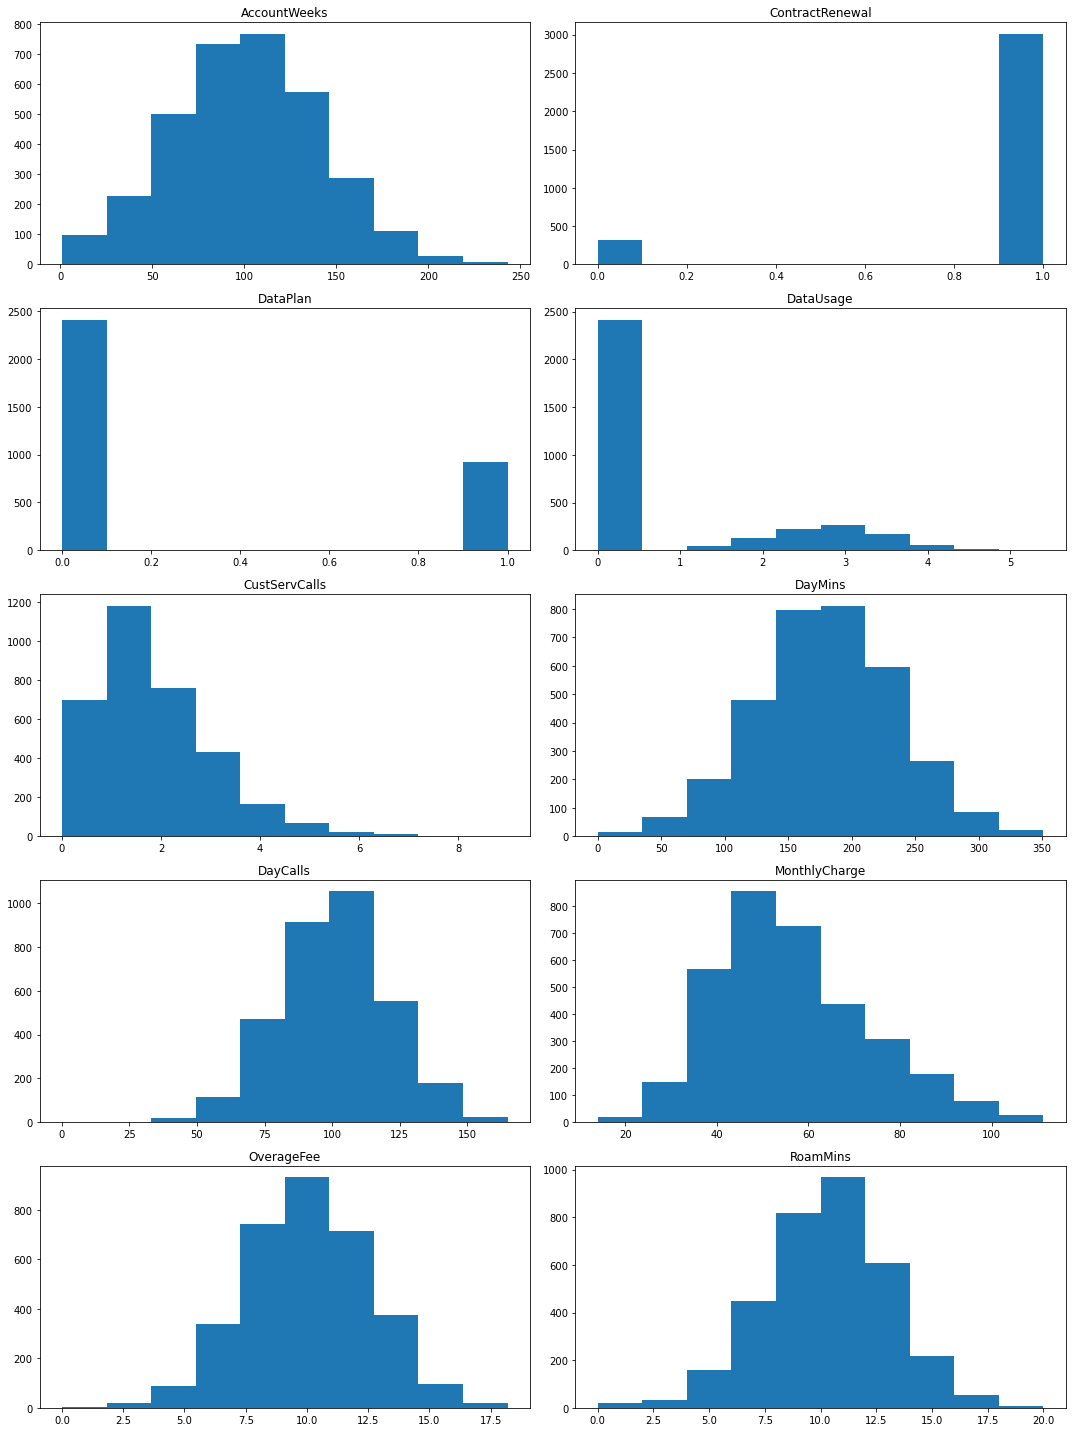

In [12]:
plt.subplots(5,2, figsize=(15,20))

for i, col in enumerate(df.iloc[:,:].columns):
    plt.subplot(5,2, i+1)
    plt.hist(df[col])
    plt.title(f'{col}')
              
plt.tight_layout()
plt.show()
    

Most of these columns exhibt a highly skewed distribution. Suggests most of the data clusters in the same region across the various features. 

We can also see that the scales are very different so we will perform some form of scaling on this data before clustering. 

Because we intend to use K_means, we will standard scale the data as we know that the algorithm does better on data with the same variance. Normality is not a requirement for the majority of clustering algorithmns. 

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss_df = ss.fit_transform(df)

In [14]:
ss_df

array([[ 0.67648946,  0.32758048,  1.6170861 , ...,  1.99072703,
        -0.0715836 , -0.08500823],
       [ 0.14906505,  0.32758048,  1.6170861 , ...,  1.56451025,
        -0.10708191,  1.24048169],
       [ 0.9025285 ,  0.32758048, -0.61839626, ..., -0.26213309,
        -1.57434567,  0.70312091],
       ...,
       [-1.83505538,  0.32758048, -0.61839626, ..., -0.01858065,
         1.73094204,  1.3837779 ],
       [ 2.08295458, -3.05268496, -0.61839626, ..., -0.38390932,
        -0.81704825, -1.87621082],
       [-0.67974475,  0.32758048,  1.6170861 , ...,  2.66049626,
         1.28129669,  1.24048169]])

## 2 - Clustering

Now that our data is clean, lets try out a few clustering algorithms. 

I will try:

    - Kmeans.
    - Agglomerative Clustering.
    
These two methods take rather different approaches so we may see some interesting differences in the results. 

##### Optimization Based

### K-means

In [15]:
from sklearn.cluster import KMeans

First thing we need to do is to find an optimal K value for the algorithm. 

In [20]:
ks = range(2,11)
inertias = []

for k in ks:
    
    #Instantiate
    Kmeans = KMeans(n_clusters=k)
    
    #Fit
    Kmeans.fit(ss_df)
    
    #Append inertias
    inertias.append(Kmeans.inertia_)

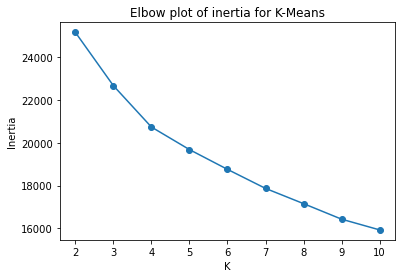

In [21]:
plt.figure()
plt.plot(ks, inertias, marker='o')
plt.title('Elbow plot of inertia for K-Means')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

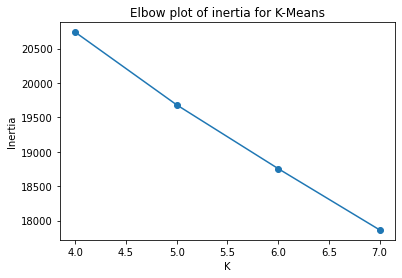

In [22]:
plt.figure()
plt.plot(ks[2:6], inertias[2:6], marker='o')
plt.title('Elbow plot of inertia for K-Means')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

We can't see a particularly distinct elbow. There does seem to be some flattening at K=4. Let's also calculate the Silhouette Score. 

In [23]:
ss_df

array([[ 0.67648946,  0.32758048,  1.6170861 , ...,  1.99072703,
        -0.0715836 , -0.08500823],
       [ 0.14906505,  0.32758048,  1.6170861 , ...,  1.56451025,
        -0.10708191,  1.24048169],
       [ 0.9025285 ,  0.32758048, -0.61839626, ..., -0.26213309,
        -1.57434567,  0.70312091],
       ...,
       [-1.83505538,  0.32758048, -0.61839626, ..., -0.01858065,
         1.73094204,  1.3837779 ],
       [ 2.08295458, -3.05268496, -0.61839626, ..., -0.38390932,
        -0.81704825, -1.87621082],
       [-0.67974475,  0.32758048,  1.6170861 , ...,  2.66049626,
         1.28129669,  1.24048169]])

In [24]:
from sklearn.metrics import silhouette_score

ks = range(2,11)
silhouette_scores = []

for k in ks:
    
    #Instantiate
    Kmeans = KMeans(n_clusters=k)
    
    #Fit
    Kmeans.fit(ss_df)
    
    #Calculate silhouette score
    silhouette_s = silhouette_score(ss_df, Kmeans.labels_)
    silhouette_scores.append(silhouette_s)
    
    print(k)
    

2
3
4
5
6
7
8
9
10


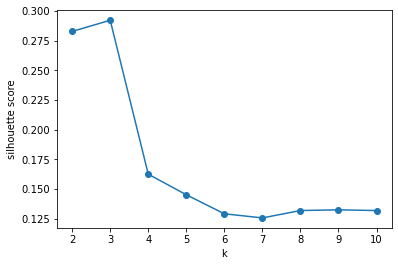

In [25]:
plt.figure()
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()

Higher silhouette scores indicates better seperation of points in a cluster to their neightbouring cluster. The graph suggests k=3 would be a good choice. 

Its worth noting, that the scores are relatively low ~0.2-0.25. This suggests the clusters are somewhat close together in feature space. There isn't a significant amount of differentiation. This is unsuprising given what we saw with the distributions of the features earlier. 

##### Hierarchical
##### Agglomerative

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
ks = range(2,11)
scores = []
for k in ks:
    agglom = AgglomerativeClustering(n_clusters=k)
    agglom.fit(ss_df)
    
    scores.append(silhouette_score(ss_df, agglom.labels_))

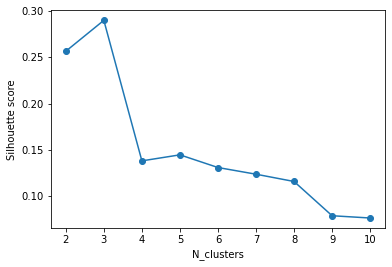

In [31]:
plt.figure()
plt.plot(ks, scores, marker='o')
plt.xlabel('N_clusters')
plt.ylabel('Silhouette score')
plt.xticks(ks)
plt.show()

##### Density Based
##### DBSCAN

In [32]:
from sklearn.cluster import DBSCAN

In [43]:
%%time
silhouette_scores = []
n_clusters = []
eps = [0.5,0.56,0.57,0.575,0.58,0.59,0.6]

# Iterate over eps
for e in eps:
    
    # Instantiate
    dbscan_model = DBSCAN(eps=e)

    # Fit
    cluster_labels = dbscan_model.fit_predict(ss_df)
    
    # Find non-noise points
    non_noise = cluster_labels[cluster_labels != -1]
    
    # Get silhouette score and number of clusters
    n_cluster = len(np.unique(non_noise))
    
    if n_cluster > 1:
        silhouette = silhouette_score(ss_df, cluster_labels)
    else:
        silhouette = np.NaN
    
    # Append to list
    n_clusters.append(n_cluster)
    silhouette_scores.append(silhouette)

Wall time: 2.08 s


In [44]:
# Put in a dataframe
pd.DataFrame({'eps':eps, 'n_clusters':n_clusters, 'silhouette':silhouette_scores})

,eps,n_clusters,silhouette
0,0.500,1,NaN
1,0.560,1,NaN
2,0.570,1,NaN
3,0.575,1,NaN
4,0.580,2,-0.277900
5,0.590,2,-0.277900
6,0.600,3,-0.319835


!!! Looks like the DBSCAN clustering can't separte the group, so let's drop this method.

Given the relatively flat curve up to K=10, lets go with k=3 so we can easily compare to the results of K-Means

##### Model Based
##### Gaussian Mixture

In [46]:
from sklearn.mixture import GaussianMixture

In [53]:
ns = range(2,11)
scores = []
for n in ns:
    gmm = GaussianMixture(n_components=n)
    gmm.fit_predict(ss_df)
    
    scores.append(gmm.fit_predict(ss_df))

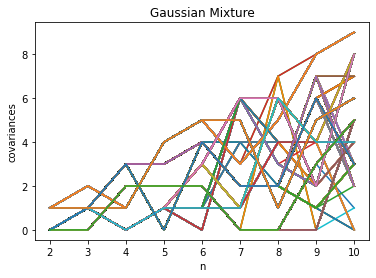

In [54]:
plt.figure()
plt.plot(ns, scores)
plt.title('Gaussian Mixture')
plt.xlabel('n')
plt.ylabel('covariances')
plt.show()

### Analyzing and segmenting our customers

Now that we have optimal K values for our two clustering techniques. We can get the class labels using K=3 for both methods and append them back to the data. 

We will use the pre-scaled data values to aid with interpretation

In [48]:
kmeans = KMeans(n_clusters=3)
agglom = AgglomerativeClustering(n_clusters=3)

kmeans.fit(ss_df)
agglom.fit(ss_df)

cc_df2 = cc_df.copy()

cc_df2['kmeans'] = kmeans.labels_
cc_df2['agglom'] = agglom.labels_


In [49]:
cc_df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans,agglom
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,2,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,2,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2,1


#### K-means cluster analysis


In [51]:
# Ima use the median, more robust to outliers
cc_df2.drop('agglom', axis=1).groupby('kmeans').median().transpose()

kmeans,0,1,2
BALANCE,3486.128260,1245.943963,471.104779
BALANCE_FREQUENCY,1.000000,1.000000,1.000000
PURCHASES,0.000000,3137.200000,317.100000
ONEOFF_PURCHASES,0.000000,1788.300000,0.000000
INSTALLMENTS_PURCHASES,0.000000,1092.320000,83.350000
CASH_ADVANCE,3133.785827,0.000000,0.000000
PURCHASES_FREQUENCY,0.000000,1.000000,0.416667
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.750000,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0.916667,0.166667
CASH_ADVANCE_FREQUENCY,0.416667,0.000000,0.000000


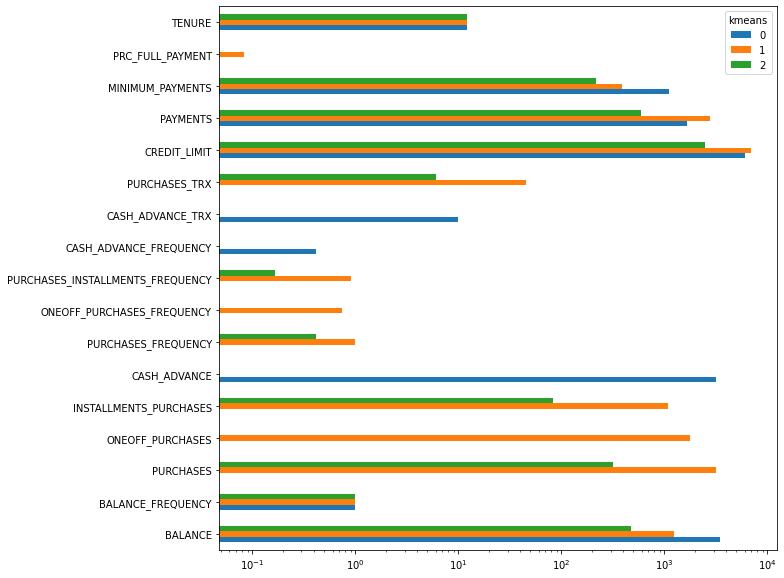

In [53]:
# Let visualise
cc_df2.drop('agglom', axis=1).groupby('kmeans').median().transpose().plot(figsize=(10,10), kind='barh')
plt.xscale('log')
plt.show()

#### Highlights:

 - Cluster 0 (Blue):
     - Highest balances on card
     - By far the highest use of cash advances in terms of count and amount.
     - High credit limits
     
Riskier customers, high usage of cash advances but lower utilization. Tend to leave balance on card. Likely to be the most profitable customer segment. 
     

 - Cluster 1 (Orange):
     - Highest credit limits
     - Highest amount payments
     - More purchases in terms of absolute count
     - Lower cash advances count and amount (compared to cluster 1)
     - Tend to pay card off in full which is credit positive
     
High utilization accounts. They likely use these cards as their primary credit card 
     
 - Cluster 2 (Green): 
     - Medium credit limits
     - Smaller payments
     - Lowest count of purchases 
     - High frequency, count, and amount of cash advances
     - Don't use installments
     - Highest balance

Infrequent card users, lower credit limits lower transactions. Potentially younger users still building credit score. Could also be users who use this card a secondary credit card. 

#### Agglomerative Clustering

In [54]:
cc_df2.drop('kmeans', axis=1).groupby('agglom').median().transpose()

agglom,0,1,2
BALANCE,635.286282,700.365084,4436.051916
BALANCE_FREQUENCY,1.000000,1.000000,1.000000
PURCHASES,1240.430000,126.645000,55.250000
ONEOFF_PURCHASES,452.600000,0.000000,0.000000
INSTALLMENTS_PURCHASES,527.320000,0.000000,0.000000
CASH_ADVANCE,0.000000,58.734156,3295.241284
PURCHASES_FREQUENCY,1.000000,0.166667,0.083333
ONEOFF_PURCHASES_FREQUENCY,0.250000,0.000000,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.833333,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,0.000000,0.083333,0.416667


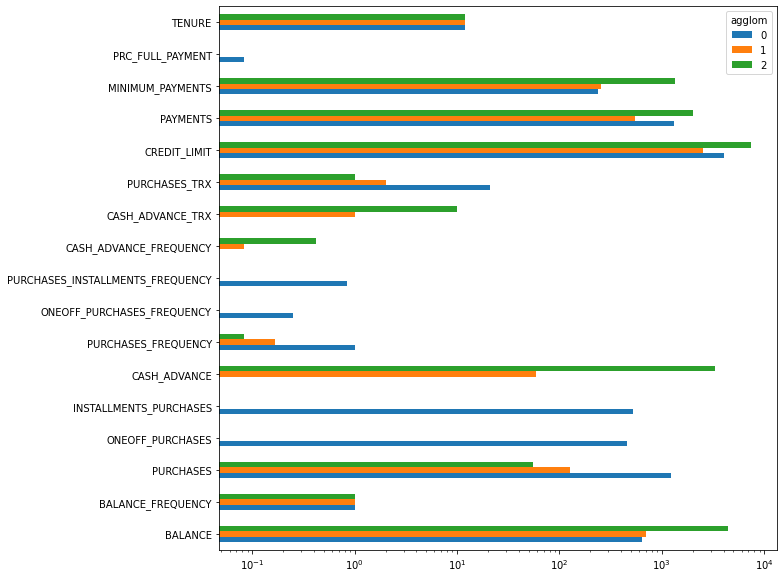

In [55]:
cc_df2.drop('kmeans', axis=1).groupby('agglom').median().transpose().plot(figsize=(10,10), kind='barh')
plt.xscale('log')
plt.show()

Without fully analysing the clusters again (worth doing yourself). These clusters do seem to share some similarity. For example, we still have a 'high risk' cluster where customers tend to use cash advances and run higher balances. 

### BONUS: Reducing down to 2 dimensions with PCA and comparing cluster similarity using the Adjusted Rand Index. 


In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(ss_df)

In [57]:
ss_pca = pd.DataFrame(pca_data, columns=['PC1','PC2'])
ss_pca['kmeans'] = kmeans.labels_
ss_pca['agglom'] = agglom.labels_

In [58]:
ss_pca.head()

,PC1,PC2,kmeans,agglom
0,-1.696396,-1.122585,2,1
1,-1.215683,2.435638,0,2
2,0.935858,-0.385207,2,0
3,-1.614638,-0.724587,2,1
4,0.223704,-0.783614,2,1


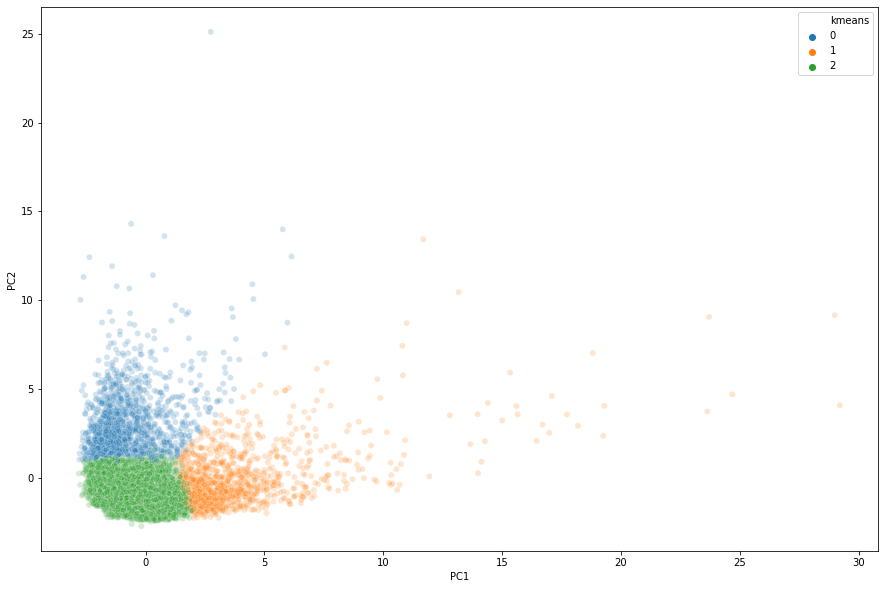

In [66]:
import seaborn as sns

plt.figure(figsize=(15,10))

sns.scatterplot(x='PC1', y='PC2', hue='kmeans', data=ss_pca, alpha=0.2, palette= sns.color_palette()[0:3])
plt.show()

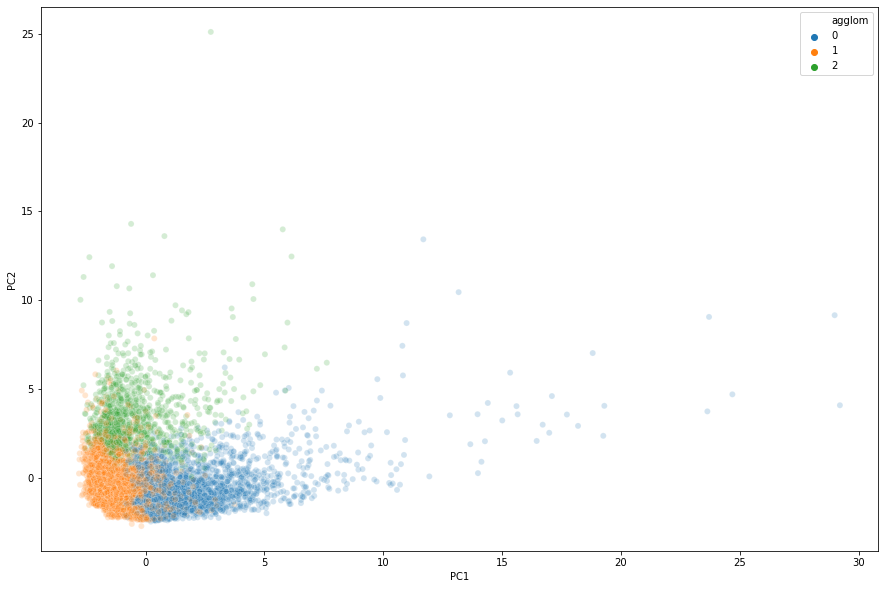

In [65]:
plt.figure(figsize=(15,10))

sns.scatterplot(x='PC1', y='PC2', hue='agglom', data=ss_pca, alpha=0.2, palette= sns.color_palette()[0:3])
plt.show()

The clusters look pretty similar! There seems to be more overlap between the clusters created by Agglomerative clustering. Unsuprising given the lower Silhouette Score

**Adjusted Rand Score**

The [Adjusted Rand Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) allows us to see how similar the clusters assigned by out methods are. It accounts for the fact that the actual cluster labels themselves may be different.

In [14]:
from sklearn.metrics import  adjusted_rand_score

In [64]:
adjusted_rand_score(cc_df2['kmeans'], cc_df2['agglom'])

0.3159976103309136

In [15]:
# It doesnt actually matter if the cluster labels are different
adjusted_rand_score([0,0,0,1,2,2], [1,1,1,2,0,0])

1.0